In [ ]:
!pip install nltk spacy gensim pyldavis scikit-learn matplotlib fasttext

import nltk
import spacy
import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Download necessary nltk resources
nltk.download('punkt')
nltk.download('stopwords')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Load dataset (using a smaller subset to speed up processing)
data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
documents = data.data[:1000]  # Use a smaller subset for faster processing


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import gensim
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Topic modeling with LDA

lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=5)  # Reduce passes for speed
topics = lda_model.print_topics(num_words=5)

print("LDA Topics:")
for topic in topics:
    print(topic)

# Visualize LDA topics with pyLDAvis
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'corpus' is not defined

In [ ]:
# Preprocess the documents
def preprocess(doc):
    tokens = word_tokenize(doc.lower())
    tokens = [token for token in tokens if token not in stopwords.words('english') and token.isalpha()]
    return tokens

processed_docs = [preprocess(doc) for doc in documents]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Topic modeling with LDA
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=5)  # Reduce passes for speed
topics = lda_model.print_topics(num_words=5)

print("LDA Topics:")
for topic in topics:
    print(topic)

# Visualize LDA topics with pyLDAvis
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LDA Topics:
(0, '0.007*"would" + 0.005*"one" + 0.004*"like" + 0.004*"use" + 0.004*"get"')
(1, '0.016*"max" + 0.009*"p" + 0.008*"n" + 0.007*"r" + 0.007*"q"')
(2, '0.006*"p" + 0.006*"h" + 0.006*"x" + 0.006*"g" + 0.006*"l"')
(3, '0.007*"people" + 0.006*"jesus" + 0.005*"would" + 0.005*"one" + 0.004*"see"')
(4, '0.006*"would" + 0.005*"good" + 0.004*"one" + 0.003*"get" + 0.003*"also"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  document  cluster
0    doc_1        2
1    doc_2        4
2    doc_3        3
3    doc_4        4
4    doc_5        3


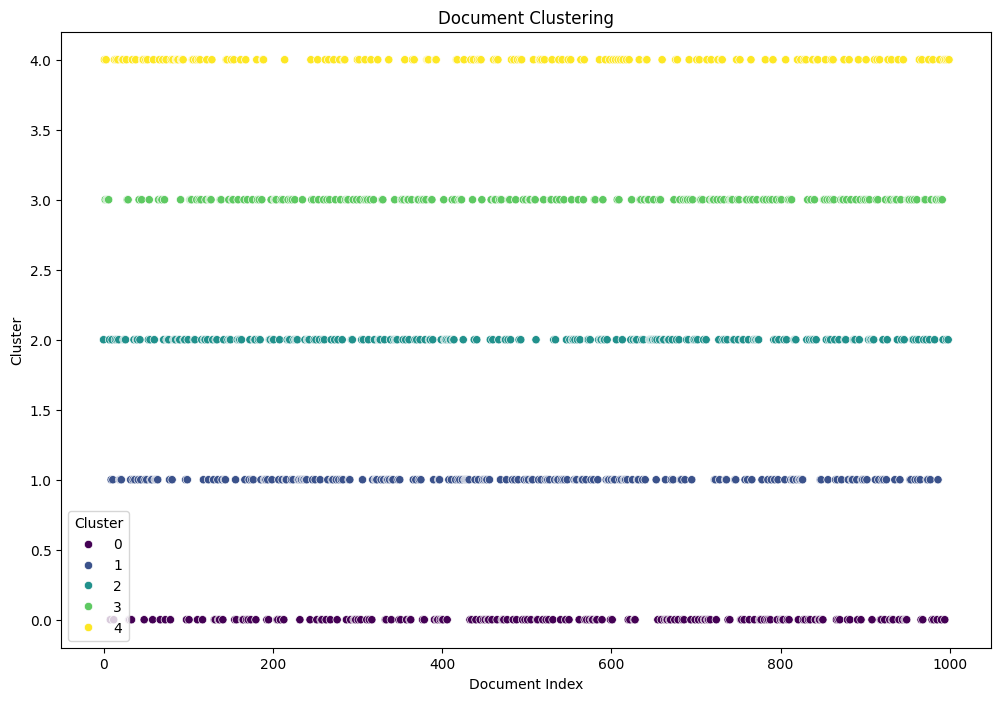

In [19]:
import numpy as np
import pandas as pd
from gensim.models import LdaModel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assume lda_model and corpus are predefined
# lda_model = LdaModel(...)  # your trained LDA model
# corpus = [...]  # your corpus represented as bag-of-words

# Generate document vectors using LDA topic distributions
lda_topic_distributions = [lda_model.get_document_topics(bow) for bow in corpus]

# Ensure all document vectors have the same length
num_topics = lda_model.num_topics
lda_vectors = np.zeros((len(lda_topic_distributions), num_topics))

for i, doc_topics in enumerate(lda_topic_distributions):
    for topic_id, topic_prob in doc_topics:
        lda_vectors[i, topic_id] = topic_prob

# Calculate cosine similarity
similarity_matrix = cosine_similarity(lda_vectors)

# Cluster the documents using KMeans
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, n_init=5, max_iter=100)
kmeans.fit(lda_vectors)
clusters = kmeans.labels_

# Assuming 'documents' is a list of your document texts
# documents = [...]  # Your list of documents

# Create a DataFrame to analyze clustering results
df = pd.DataFrame({
    'document': documents,
    'cluster': clusters
})

# Display the first few rows of the DataFrame
print(df.head())

# Visualize clustering results
sns.set_palette('deep')
plt.figure(figsize=(12, 8))

# Scatter plot with seaborn
sns.scatterplot(
    x=range(len(clusters)),
    y=clusters,
    hue=clusters,
    palette='viridis',
    legend='full'
)

# Add labels and title
plt.xlabel('Document Index')
plt.ylabel('Cluster')
plt.title('Document Clustering')
plt.legend(title='Cluster')

# Display the plot
plt.show()
